<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Airlines%20Passanger%20Predictions%20Using%20RNN-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Airlines Passanger Predictions Using RNN-LSTM**

**Import Libraries**

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

**Load Dataset**

In [19]:
dataset = pd.read_csv("data/AirPassengers.csv")
dataset = dataset["#Passengers"]
dataset = np.array(dataset).reshape(-1, 1)

**Visualize Dataset**

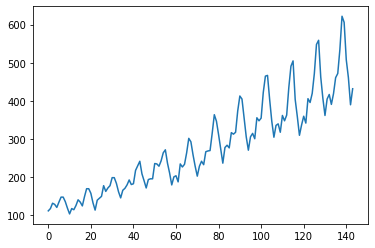

In [20]:
import matplotlib.pyplot as plt
plt.plot(dataset)
# We will use upto 100 months as a training dataset and after 100 months as testing datase

**Train and Test Split**

In [21]:
# Split into Test and Train dataset
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
test = dataset[train_size:, :]

# Building Test and Training Dataset
def get_data(dataset, look_back):

    dataX, dataY = [], []

    for i in range(len(dataset) - look_back - 1):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])

    return np.array(dataX), np.array(dataY)

look_back = 1
x_train, y_train = get_data(train, look_back)
x_test, y_test = get_data(test, look_back)

**Reshape Dataset**

In [22]:
# Converting 2D to 3D dataset
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

**Approach 1**

**Normalize Dataset**

In [23]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(x_train)

**Model**

In [28]:
# Input Layer
inputs = keras.Input(shape=(1, look_back))

# Normalization
x = normalizer(inputs)

# LSTM Layer
x = keras.layers.LSTM(units=5)(x)

# Output layer
outputs = keras.layers.Dense(1)(x)

# Model
model = keras.Model(inputs=inputs, outputs=[outputs], name="lstm_model")

**Summary**

In [29]:
model.summary()

Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 normalization (Normalizatio  multiple                 3         
 n)                                                              
                                                                 
 lstm_4 (LSTM)               (None, 5)                 140       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 149
Trainable params: 146
Non-trainable params: 3
_________________________________________________________________


**Compile**

In [31]:
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=loss, optimizer=optim)

**Tensorboard**

In [32]:
%load_ext tensorboard
import datetime

# Clear any logs from previous runs
!del -ff ./logs/lstm/

# Log Dir
log_dir = "logs/lstm/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Invalid switch - "logs".


**Train**

In [34]:
history = model.fit(x_train, y_train,
                        epochs=50,
                        batch_size=100, 
                        validation_data=(x_test, y_test), 
                        verbose=1, 
                        callbacks=[tensorboard_callback])

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 52866.0117 - val_loss: 184584.3750
Epoch 2/50
1/1 [==============================] - 0s 75ms/step - loss: 52865.0938 - val_loss: 184580.2812
Epoch 3/50
1/1 [==============================] - 0s 81ms/step - loss: 52864.1797 - val_loss: 184576.1719
Epoch 4/50
1/1 [==============================] - 0s 86ms/step - loss: 52863.2656 - val_loss: 184572.0781
Epoch 5/50
1/1 [==============================] - 0s 77ms/step - loss: 52862.3477 - val_loss: 184567.9688
Epoch 6/50
1/1 [==============================] - 0s 64ms/step - loss: 52861.4375 - val_loss: 184563.9062
Epoch 7/50
1/1 [==============================] - 0s 64ms/step - loss: 52860.5312 - val_loss: 184559.8281
Epoch 8/50
1/1 [==============================] - 0s 63ms/step - loss: 52859.6133 - val_loss: 184555.7344
Epoch 9/50
1/1 [==============================] - 0s 58ms/step - loss: 52858.7109 - val_loss: 184551.6875
Epoch 10/50
1/1 [==============================]

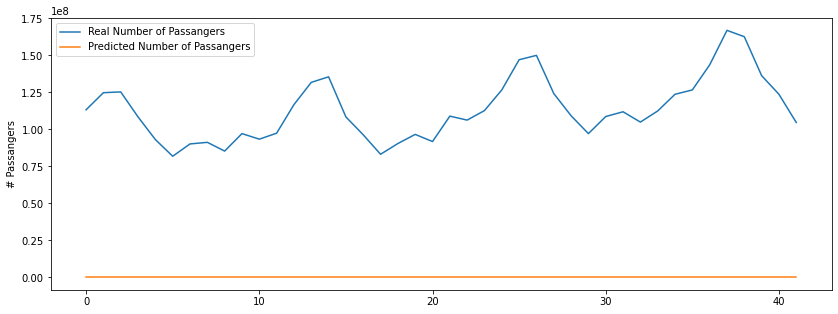

In [39]:
y_pred = model.predict(x_test)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)

# Plot baselines and predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test, label="Real Number of Passangers")
plt.plot(y_pred, label="Predicted Number of Passangers")
plt.ylabel("# Passangers")
plt.legend()
plt.show()

**Approach 2**

**Sacle Dataset**

In [35]:
from sklearn.preprocessing import MinMaxScaler
# Converting dataset between 0 and 1
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5)                 140       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
98/98 [==============================] - 1s 1ms/step - loss: 52835.3633
Epoch 2/50
98/98 [==============================] - 0s 1ms/step - loss: 52794.7695
Epoch 3/50
98/98 [==============================] - 0s 1ms/step - loss: 52754.0039
Epoch 4/50
98/98 [==============================] - 0s 1ms/step - loss: 52713.3672
Epoch 5/50
98/98 [==============================] - 0s 1ms/step - loss: 52673.0469
Epoch 6/50
98/98 [=====================

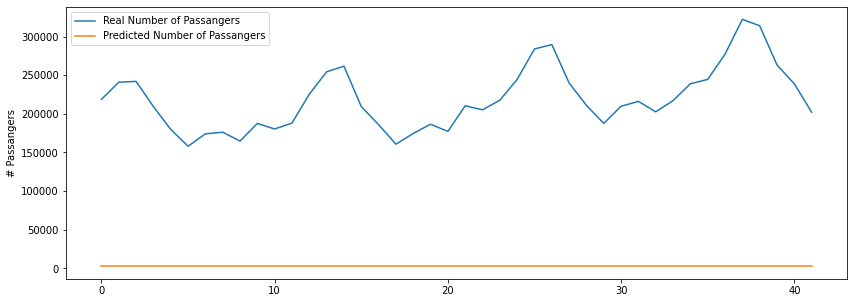

In [36]:
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM, Dense
from keras.models import Sequential

# Build The Model
model = Sequential()
model.add(LSTM(units=5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()
model.fit(x_train, y_train, epochs=50, batch_size=1)

y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

# Plot baselines and predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test, label="Real Number of Passangers")
plt.plot(y_pred, label="Predicted Number of Passangers")
plt.ylabel("# Passangers")
plt.legend()
plt.show()